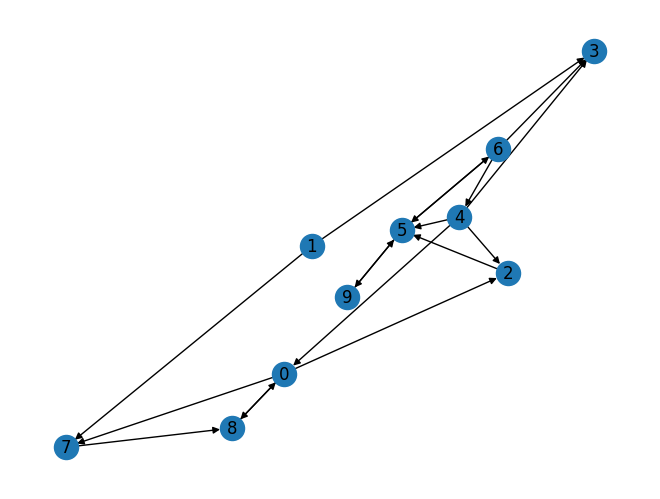

In [3]:
import networkx as nx
import random
from gensim.models import Word2Vec
import time

n = 10
p = 0.15

G = nx.erdos_renyi_graph(n, p, directed = True)

nx.draw(G, with_labels = True)


In [6]:
# idea:
# create graph and copy graph and make slight adjustments, compare both embeddings and caclulate distance
# have block using skipgram and alternative block using skipgram implementation from scratch (check geeksforgeeks for this, in separate python file)

# adjust signature for graph type

def random_walk(graph, start_node:int = 0, walk_length:int = 1) -> list[int]:

    sequence = [start_node]

    for _ in range(walk_length):
        neighbours = [neighbour for neighbour in graph.neighbors(start_node)]
        if neighbours == []:
          return sequence
        selected_neighbour = random.choice(neighbours)
        sequence.append(selected_neighbour)
        start_node = selected_neighbour

    return sequence

# example of random walks in graph
for _ in range(5):
    print(random_walk(G, random.randrange(n), random.randrange(4,10)))

# create walks for Word2Vec

amount_walks = 200
length_per_walk = 20

walks = []

for _ in range(amount_walks):
  walks.append(random_walk(G, random.randrange(n), length_per_walk))


# play around with Word2Vec hyperparameters

skip_gram = Word2Vec(walks, vector_size = amount_walks, window = 2, sg = 1, min_count = 1)
skip_gram.train(walks, total_examples = skip_gram.corpus_count, epochs = 30, report_delay = 1)


# testing / add clr screen, etc to it

input_number = 0

while input_number != -1:
  input_number = int(input("Similarity to which node would you like to check (enter -1 to exit): "))
  if input_number != -1:
    for node_details in skip_gram.wv.most_similar(positive = [input_number]):
      print(node_details)
    print()
    time.sleep(5)

[5, 6, 4, 2, 5, 9]
[3]
[4, 3]
[8, 0, 7, 8, 0, 7, 8]
[1, 3]
Similarity to which node would you like to check (enter -1 to exit): 9
(5, 0.9961754083633423)
(6, 0.989657461643219)
(3, 0.9716338515281677)
(4, 0.9694505929946899)
(2, 0.9428749084472656)
(1, 0.8640068173408508)
(7, 0.7092403173446655)
(8, 0.6544204950332642)
(0, 0.6276580691337585)



KeyboardInterrupt: Interrupted by user